# PHY 102 Lab - Magnetic Force

## Cell 1

Run this once and move on!


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib import animation, patches
from scipy.integrate import odeint
plt.rcParams['text.usetex'] = True
%matplotlib notebook

# Functions
def derivs(params,t):
    global in_mag_field, vxi, vyi
    # Solves ODE for motion of particle q
    x,y,vx,vy = params
        
    # derivative of position is velocity
    x_deriv = vx
    y_deriv = vy
    
    # derivative of velocity is acceleration
    
    # Depends on which region we're in...
    if x > left_edge and x < right_edge:
        if in_mag_field and vx <0:
            # we've entered the magnetic field and looped back
            # in to the electric field; stop
            return 0,0,0,0
        # In the region with the electric field
        vx_deriv = q*E/m
        vy_deriv = 0
    elif x > right_edge:
        # In the region with the magnetic field
        in_mag_field = True
        vx_deriv = q*vy*B
        vy_deriv = -q*vx*B
    else:
        # Neither (initial motion)
        vx_deriv = 0
        vy_deriv = 0
        
    return x_deriv,y_deriv,vx_deriv,vy_deriv

def update(i):
    # Used to update animated figure
    marker_q.set_offsets([xpoints[i],ypoints[i]])
 

## Cell 2 

<IPython.core.display.Javascript object>


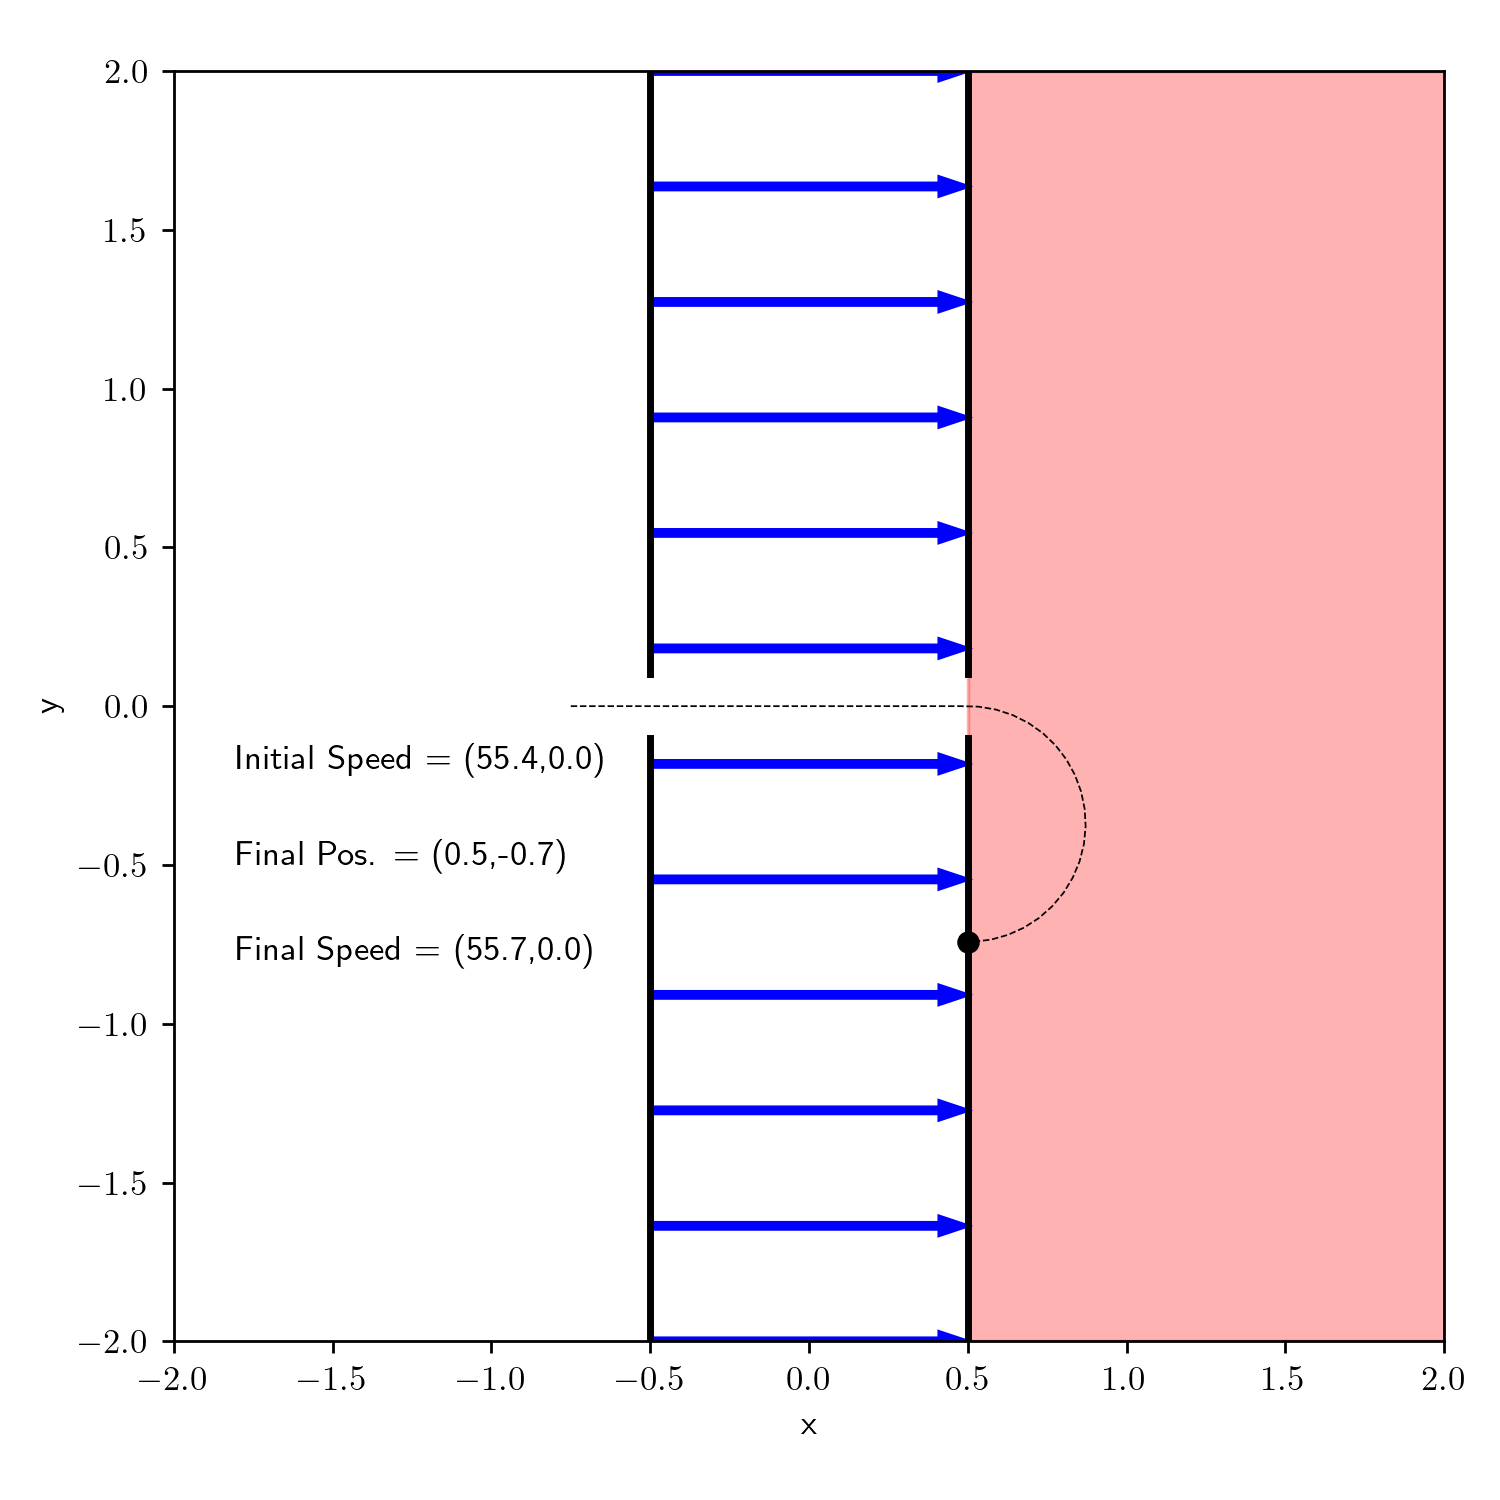

In [72]:
#Parameter values (edit these!)
q = 1         # Default: 1
B = 150       # Default: 150

# ====================================
# Don't edit anything below this line!
# ====================================

E = 1500         
m = 1         
vx0 = 10        
x0 = -0.75       
y0=0
vy0=0
in_mag_field = False

left_edge,right_edge = -0.5,0.5         # region of nonzero E field

time_in,time_out = 0,0                  # track when the particle enters/exits the field

# Obtain simulation results data
tpoints = np.linspace(0,1,1000)         # time
output = odeint(derivs,[x0,y0,vx0,vy0],tpoints) # solve ODE
xpoints = output[:,0]                   # parse out x positions for q
ypoints = output[:,1]                   # parse out y positions for q
vxpoints = output[:,2]                  # parse out x velocities for q
vypoints = output[:,3]                  # parse out y velocities for q

# Find velocity as it leaves the E field
time_out_index = np.argwhere(xpoints>right_edge)
time_out_index = time_out_index[0][0]
vxi = vxpoints[time_out_index]
vyi = vypoints[time_out_index-1]

# Make a figure
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
# Annotations for the E field
ax.plot([left_edge,left_edge],[2,0.1],c='k',lw=2)
ax.plot([left_edge,left_edge],[-0.1,-2],c='k',lw=2)
ax.plot([right_edge,right_edge],[2,0.1],c='k',lw=2)
ax.plot([right_edge,right_edge],[-0.1,-2],c='k',lw=2)
for y in np.linspace(-2,2,12):
    ax.arrow(left_edge,y,abs(left_edge)+abs(right_edge),0,fc='b',ec='b',width=0.02,length_includes_head=True)
# and the B field
#patches.Rectangle([.5,-2],2,2,color='b',alpha=0.5)
ax.fill_betweenx([-2,2],0.5,2.5,color='r',alpha=0.3)
# Text for the final speed, time in field
ax.annotate('Initial Speed = ({0:.1f},{1:.1f})'.format(vxi,vyi),(-1.8,-0.2))
ax.annotate('Final Pos. = ({0:.1f},{1:.1f})'.format(xpoints[-1],ypoints[-1]),(-1.8,-0.5))
ax.annotate('Final Speed = ({0:.1f},{1:.1f})'.format(abs(vxpoints[-1]),abs(vypoints[-1])),(-1.8,-0.8))

# Draw the charge
marker_q = ax.scatter(x0,0,marker='o',s=30,c='k')

ax.plot(xpoints,ypoints,'k--',lw=0.5)

# Zest for flavor
ax.set_xlim(-2.0,2.0)
ax.set_ylim(-2.0,2.0)
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_aspect('equal')
plt.tight_layout()
plt.show()

# Run animation
fps = 30
nSeconds = 5
ani = animation.FuncAnimation(fig, update, frames = nSeconds * fps,interval = 1000 / fps, repeat_delay=300)

